<a href="https://colab.research.google.com/github/attrigirish/python-ml/blob/master/TF_02_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)


1.13.1


In [0]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [0]:
#Exploring Data

print("Train Features Dimensions : ", train_images.ndim)
print("Train Features Shape : ", train_images.shape)
print("Train Features Size : " , len(train_images))

print("\n\n")

print("Test Features Dimensions : ", test_images.ndim)
print("Test Features Shape : ", test_images.shape)
print("Test Features Size : " , len(test_images))

Train Features Dimensions :  3
Train Features Shape :  (60000, 28, 28)
Train Features Size :  60000



Test Features Dimensions :  3
Test Features Shape :  (10000, 28, 28)
Test Features Size :  10000


In [0]:
#Exploring Images

print(train_images[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

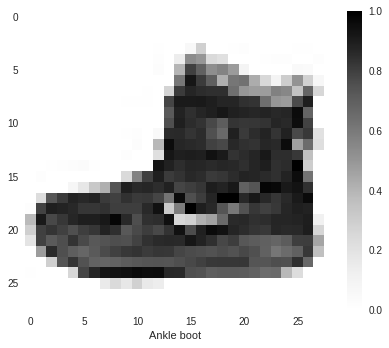

In [0]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.xlabel(class_names[train_labels[0]])
plt.show()


In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

print(train_images[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

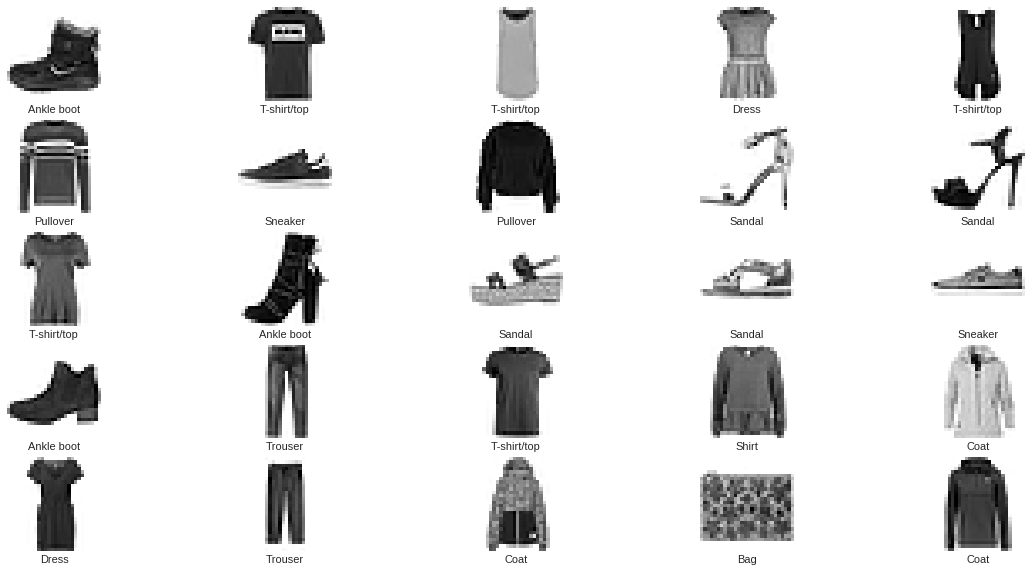

In [0]:
plt.figure(figsize=(20,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])


Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [0]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 9s 157us/sample - loss: 0.5022 - acc: 0.8225
Epoch 2/10
60000/60000 [==============================] - 8s 139us/sample - loss: 0.3767 - acc: 0.8651
Epoch 3/10
60000/60000 [==============================] - 8s 133us/sample - loss: 0.3391 - acc: 0.8757
Epoch 4/10
60000/60000 [==============================] - 9s 147us/sample - loss: 0.3148 - acc: 0.8842
Epoch 5/10
60000/60000 [==============================] - 8s 141us/sample - loss: 0.2989 - acc: 0.8910
Epoch 6/10
60000/60000 [==============================] - 9s 146us/sample - loss: 0.2832 - acc: 0.8953
Epoch 7/10
60000/60000 [==============================] - 8s 128us/sample - loss: 0.2710 - acc: 0.8990
Epoch 8/10
60000/60000 [==============================] - 9s 150us/sample - loss: 0.2607 - acc: 0.9031
Epoch 9/10
60000/60000 [==============================] - 9s 147us/sample - loss: 0.2501 - acc: 0.9066
Epoch 10/10
60000/60000 [==============================] - 8s 139us/sampl

In [0]:
test_loss, test_acc = model.evaluate(test_images, test_labels)


10000/10000 [==============================] - 1s 51us/sample - loss: 0.3564 - acc: 0.8774


In [0]:
predictions = model.predict(test_images)

p_index=500

print("Actual Class for The First Test Image : ", test_labels[p_index],class_names[test_labels[p_index]])
print("Confidence Score : ",predictions[p_index])
print("Model Output : ", np.argmax(predictions[p_index]), class_names[np.argmax(predictions[p_index])])


Actual Class for The First Test Image :  2 Pullover
Confidence Score :  [1.2639495e-02 4.4565141e-04 4.0123603e-01 3.2589836e-03 1.2998793e-01
 3.2687694e-05 4.3743980e-01 5.1890984e-06 1.4941226e-02 1.3042966e-05]
Model Output :  6 Shirt
